# Brief Summary ##


1.  Library Setup
2.  Data Collection and Data Understanding
3.  Exploratory Data Analysis
4.  Data Preparation
5.  Model Development and Obtain best classifier through Parameter-Tuning via Cross validation
6.  Validation of model on holdout data (validation data) along with performance summary
7.  Final Prediction on loan data (year 2008)
8.  Model Object Save

## Important Libraries Import

In [377]:
# Important Libraries Import

# For environment setup 
import os

# For data analysis/
import pandas as pd
import numpy as np
import time
import re

# For Visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
from plotly import tools
import chart_studio.plotly as py
from scipy import stats
%matplotlib inline


# For data preparation for model development
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import random
from sklearn.feature_selection  import SelectFromModel
from sklearn.preprocessing import OneHotEncoder

# For machine learning model building and performance analysis
from sklearn.metrics import classification_report,accuracy_score,roc_curve,auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection  import SelectFromModel
import statsmodels.api as sm1
from xgboost import XGBClassifier
from sklearn import linear_model,svm
from sklearn import metrics
from scipy import interp
from itertools import cycle

# Final Model Save
import pickle

pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",150)

import warnings
warnings.filterwarnings('ignore')

## Data Collection and Understanding

In [378]:
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",150)
os.chdir('F:\\LocalDriveD\\Analytics\\Interview\\Bajaj IJP')
df = pd.read_csv('LoanStats3a_securev1.csv',skiprows=1)
df.shape
#df.info(null_counts=True,max_cols=200)


(42535, 150)

In [379]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,Dec-2019,734.0,730.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,N

28 columns are categorical/object  

122 columns are numerical/float

We can see that many of the attributes have complete missing values

target variable is loan_status


#### Loan Count

In [380]:
df.id.nunique() # total unique 42535 loan records
df.issue_d.value_counts().sort_values(ascending=False)[:10] #Dec-2011 month has seen highest application of loan

Dec-2011    2267
Nov-2011    2232
Oct-2011    2118
Sep-2011    2067
Aug-2011    1934
Jul-2011    1875
Jun-2011    1835
May-2011    1704
Apr-2011    1563
Mar-2011    1447
Name: issue_d, dtype: int64

#### Loan Issue Duration
We will derive year of application and quarter of application

In [381]:
df['issue_date'] = pd.to_datetime(df.issue_d)
df['issue_quarter'] = df.issue_date.apply(lambda x:x.quarter)
df.issue_quarter = df.issue_quarter.astype(str)
df.issue_quarter.value_counts()
df['issue_year'] = df.issue_date.apply(lambda x:x.year)
df.issue_year.value_counts()
del df['issue_d']

#### Response Variable

Fully Paid                                             34113
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64


[Text(0, 0, 'Fully Paid'),
 Text(0, 0, 'Charged Off'),
 Text(0, 0, 'Does not meet the credit policy. Status:Fully Paid'),
 Text(0, 0, 'Does not meet the credit policy. Status:Charged Off')]

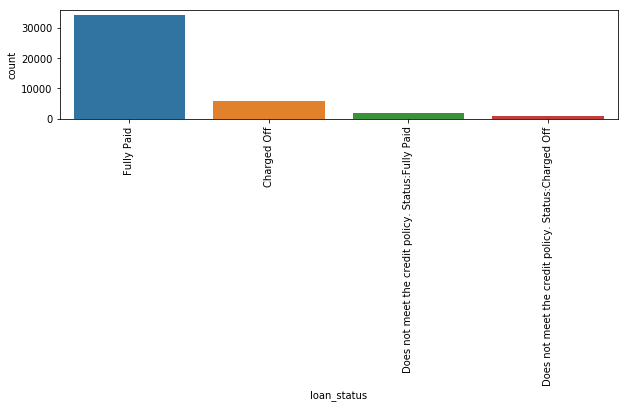

In [382]:
print(df.loan_status.value_counts())
fig, ax =plt.subplots(1,1,figsize=(10,2))
s0 = sns.countplot(x="loan_status", data=df,ax=ax)
s0.set_xticklabels(s0.get_xticklabels(),rotation=90)

###### Removing loan_types 'Does not meet credit policy...' because  It is not clear why loans are given to users that “Does not meet the credit policy” and there is not much documentation on these categories.

In [383]:
df = df[(df['loan_status']=='Fully Paid') | (df['loan_status']=='Charged Off')] 
df['Loan_Default'] = np.where(df['loan_status']=='Fully Paid','No','Yes')
df['Loan_Default'] = df['Loan_Default'].astype(str)
del df['loan_status']

## Exploratory Data Analysis


Since many columns contain a high amount of missing values [more than 20%] . 

we can reduce memory via dropping these columns .

we will drop these columns because imputation will on a large portion of data  .

In [384]:
missing_values = df.isnull().mean().sort_values(ascending=False) 
len(missing_values[missing_values==1]*100)
# total  83 columns are there which have 100% missing data
high_missingvalue_col = sorted(list(missing_values[missing_values > 0.2].index))
#print(high_missingvalue_col)
df= df.drop(high_missingvalue_col,axis=1)

We include only those variables in model development which will be availble to investors during time of application
Only keep loan features known to potential investors


In [385]:
Dropping_Variables= ['acc_now_delinq','collection_recovery_fee','delinq_2yrs','debt_settlement_flag','delinq_amnt',
'funded_amnt','funded_amnt_inv','last_credit_pull_d',
'last_fico_range_high','last_fico_range_low','last_pymnt_amnt',
'last_pymnt_d','out_prncp','out_prncp_inv','recoveries',
'total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee',
    'total_rec_prncp']
df = df.drop(Dropping_Variables,axis=1)

#### Univariate Analysis 

Many variables have only 1 value. These can be dropped

In [386]:
unique = df.nunique()[df.nunique()==1].index 
df = df.drop(unique,axis=1)
df.nunique().sort_values(ascending=False)[:10] # top 10 variables with their unique values

id             39783
url            39783
emp_title      28861
revol_bal      21737
title          19642
installment    15404
annual_inc      5323
dti             2868
revol_util      1089
loan_amnt        885
dtype: int64

In [387]:
print(df.id.nunique(), 'Unique IDs')
# this is a nominal variable which won't add any value in model training, so we will drop this
df = df.drop(columns= 'id')

39783 Unique IDs


In [388]:
df.emp_title.head()
print(df.emp_title.head(5))
print(df.emp_title.nunique(),'Unique Emp_Titles') # Emp_Title column contains a high number of unique values , this can be dropped
del df['emp_title']

0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object
28861 Unique Emp_Titles


In [389]:
df.url.head()
print(df.url.nunique(),'Unique URLS') # URL column contains a high number of unique values , this can be dropped
del df['url']

39783 Unique URLS


In [390]:
df.title.head()
print(df.title.head(5))
print(df.title.nunique(), 'Unique Titles') # Title column contains a high number of unique values , this can be dropped 
del df['title']

0                Computer
1                    bike
2    real estate business
3                personel
4                Personal
Name: title, dtype: object
19642 Unique Titles


[Text(0, 0, ' 36 months'), Text(0, 0, ' 60 months')]

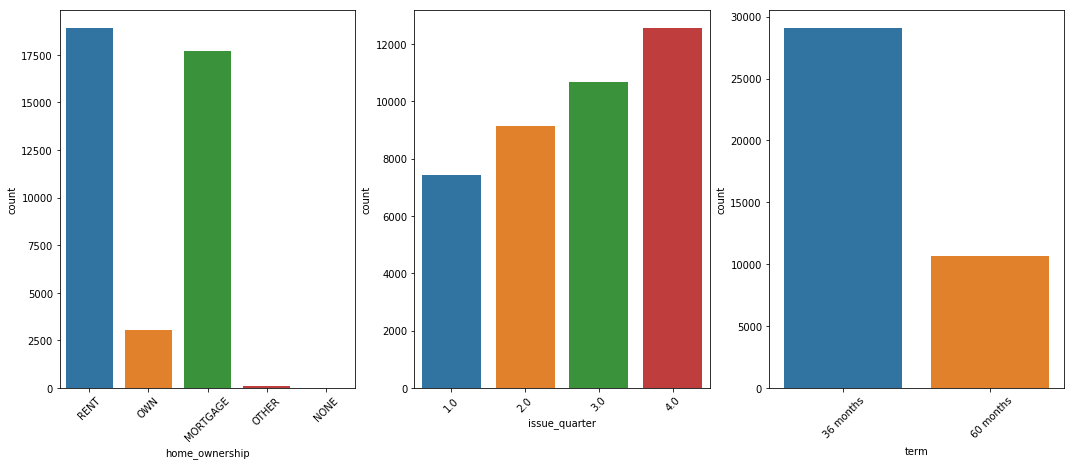

In [391]:
fig, ax =plt.subplots(1,3,figsize=(18,6))
plt.subplots_adjust(hspace = 0.4, top = 1.0)

s1 = sns.countplot(x="home_ownership", data=df,ax=ax[0])
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)

s1 = sns.countplot(x="issue_quarter", data=df,ax=ax[1])
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)

s0 = sns.countplot(x="term", data=df,ax=ax[2])
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)


Maximum number of loans are issued for 3 year duration

People who OWN house less apply for loan 

Maximum number of loans issues in 4th quarter


In [392]:
#Data Dictionary: "The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER."
df['home_ownership'] = np.where(df['home_ownership']=='NONE','OTHER',df['home_ownership'])

[Text(0, 0, 'B'),
 Text(0, 0, 'C'),
 Text(0, 0, 'A'),
 Text(0, 0, 'E'),
 Text(0, 0, 'F'),
 Text(0, 0, 'D'),
 Text(0, 0, 'G')]

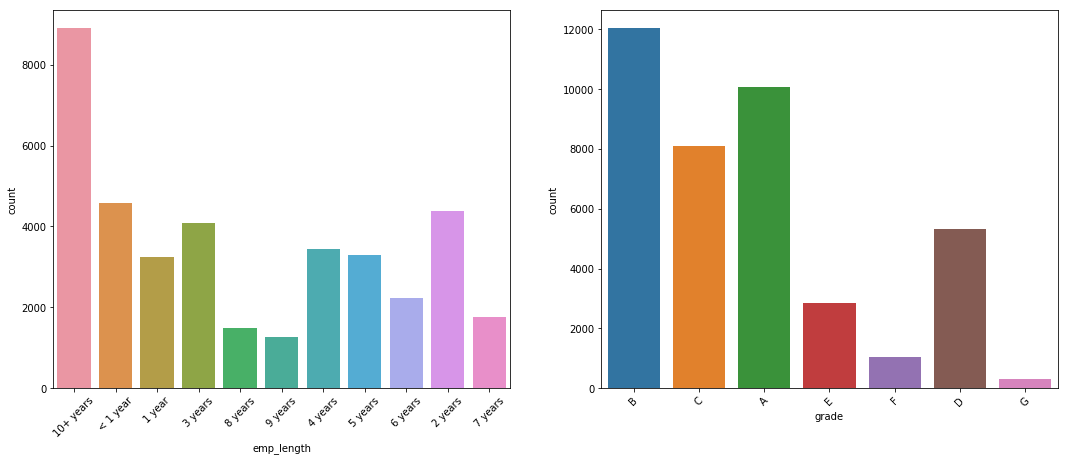

In [393]:
fig, ax =plt.subplots(1,2,figsize=(18,6))
plt.subplots_adjust(hspace = 0.4, top = 1.0)

#Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
s0 = sns.countplot(x="emp_length", data=df,ax=ax[0])
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)

s1 = sns.countplot(x="grade", data=df,ax=ax[1])
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)

People with higher experience prefer loan first; probably requirements raised due to family need

[Text(0, 0, 'B2'),
 Text(0, 0, 'C4'),
 Text(0, 0, 'C5'),
 Text(0, 0, 'C1'),
 Text(0, 0, 'B5'),
 Text(0, 0, 'A4'),
 Text(0, 0, 'E1'),
 Text(0, 0, 'F2'),
 Text(0, 0, 'C3'),
 Text(0, 0, 'B1'),
 Text(0, 0, 'D1'),
 Text(0, 0, 'A1'),
 Text(0, 0, 'B3'),
 Text(0, 0, 'B4'),
 Text(0, 0, 'C2'),
 Text(0, 0, 'D2'),
 Text(0, 0, 'A3'),
 Text(0, 0, 'A5'),
 Text(0, 0, 'D5'),
 Text(0, 0, 'A2'),
 Text(0, 0, 'E4'),
 Text(0, 0, 'D3'),
 Text(0, 0, 'D4'),
 Text(0, 0, 'F3'),
 Text(0, 0, 'E3'),
 Text(0, 0, 'F4'),
 Text(0, 0, 'F1'),
 Text(0, 0, 'E5'),
 Text(0, 0, 'G4'),
 Text(0, 0, 'E2'),
 Text(0, 0, 'G3'),
 Text(0, 0, 'G2'),
 Text(0, 0, 'G1'),
 Text(0, 0, 'F5'),
 Text(0, 0, 'G5')]

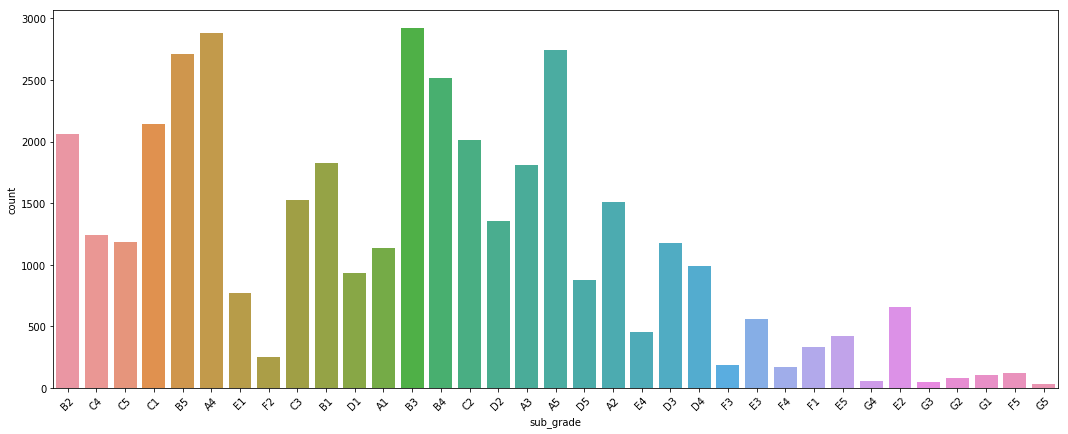

In [394]:
fig, ax =plt.subplots(1,1,figsize=(18,6))
plt.subplots_adjust(hspace = 0.4, top = 1.0)

#Lending card assigned loan sub_grade
s0 = sns.countplot(x="sub_grade", data=df,ax=ax)
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)

In [395]:
#Since sub_grades are subset of Grades, we can exclude 'sub_grades ' and include only 'Grades'
df = df.drop('sub_grade',axis=1)

###### We can derived MOB ( Month on Board ):  Difference between "loan application month" and "earliest_cr_line: The month the borrower's earliest reported credit line was opened"

In [396]:
print(df.earliest_cr_line.head())
df['earliest_cr_line_date'] = pd.to_datetime(df.earliest_cr_line)
df['MOB'] = df['issue_date']  - df['earliest_cr_line_date']
df['MOB'] = df['MOB'].apply(lambda x:int((x.days)/30))
df = df.drop(['earliest_cr_line','issue_date','earliest_cr_line_date'],axis=1)

0    Jan-1985
1    Apr-1999
2    Nov-2001
3    Feb-1996
4    Jan-1996
Name: earliest_cr_line, dtype: object


"pub_rec_bankruptcies": Number of public record bankruptcies. 
we can bucketize it into zero and non-zero to reduce biasness into data which was caused by low frequent categories

In [397]:
df.pub_rec_bankruptcies.value_counts() 
df.pub_rec_bankruptcies = np.where(df.pub_rec_bankruptcies>0,'Greater_Than_Zero','Zero')
df.pub_rec.value_counts()
df.pub_rec = np.where(df.pub_rec>0,'Greater_Than_Zero','Zero')

In [398]:
print(df.addr_state.nunique(), 'Total Distinct States')
# we can drop this because this is nominal variable and contains 50 catgories
print(df.zip_code.nunique(), 'Total Distinct ZipCode')
# we can drop this because this is nominal variable and contains 823 catgories

df = df.drop(['addr_state','zip_code'],axis=1)


50 Total Distinct States
823 Total Distinct ZipCode


Converting Rates into Floats

In [399]:
df['revol_util'] = df['revol_util'].str.replace('%','')
df['revol_util'] = df['revol_util'].astype(float)

df['int_rate'] = df['int_rate'].str.replace('%','')
df['int_rate'] = df['int_rate'].astype(float)

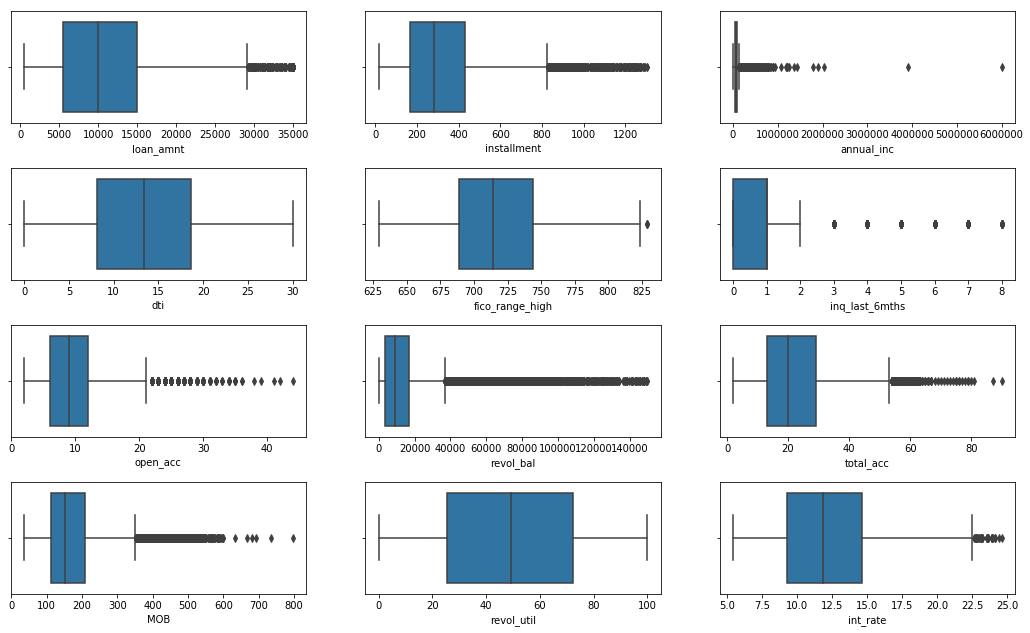

In [400]:
fig, ax =plt.subplots(4,3, figsize=(18,12))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

#sns.distplot(df.loan_amnt,  axlabel="Loan Amount", label="Loan Amount Frequency distribution",color='y',ax=ax[0][0])
sns.boxplot(df.loan_amnt, ax=ax[0][0])
fig.show()
# installment distribution plot
sns.boxplot(df.installment, ax=ax[0][1]) #The monthly payment owed by the borrower if the loan originates.
fig.show()
# funded_annual_inc distribution plot
sns.boxplot(df.annual_inc,  ax=ax[0][2])
fig.show()
# sti ( debt to income ratio ) distribution plot
sns.boxplot(df.dti, ax=ax[1][0])
fig.show()
# fico_range_high  distribution plot
sns.boxplot(df.fico_range_high, ax=ax[1][1]) #fico score is a 300-850 range score that signifies credit worthiness of borrower
fig.show()
# inq_last_6mths (enqiry last month) distribution plot
sns.boxplot(df.inq_last_6mths, ax=ax[1][2])
fig.show()
# delinq_amnt distribution plot
sns.boxplot(df.open_acc, ax=ax[2][0])
fig.show()
# revol_bal distribution plot
sns.boxplot(df.revol_bal, ax=ax[2][1]) #In credit card terms, a revolving balance is the portion of credit card spending that goes unpaid at the end of a billing cycle
fig.show()
# total_acc  distribution plot
sns.boxplot(df.total_acc, ax=ax[2][2]) # The total number of credit lines currently in the borrower's credit file
fig.show()
# MOB distribution plot
sns.boxplot(df.MOB, ax=ax[3][0])
fig.show()

# revol_util distribution plot
sns.boxplot(df.revol_util, ax=ax[3][1]) # revolving utilization ratio is also known as  debt-to-limit ratio or credit utilization ratio
fig.show()

# int_rate (Interest Rate on the loan) distribution plot
sns.boxplot(df.int_rate, ax=ax[3][2]) 
fig.show()



Insight: 
    
Although most of the variables show values beyond upper whisker of box plot but as per business sense Outliers that can be considered in revol_bal,fico_range_high, annual_inc,total_Acc,open_acc,MOB. We will treat outliers in 


#### Bivariate Analysis


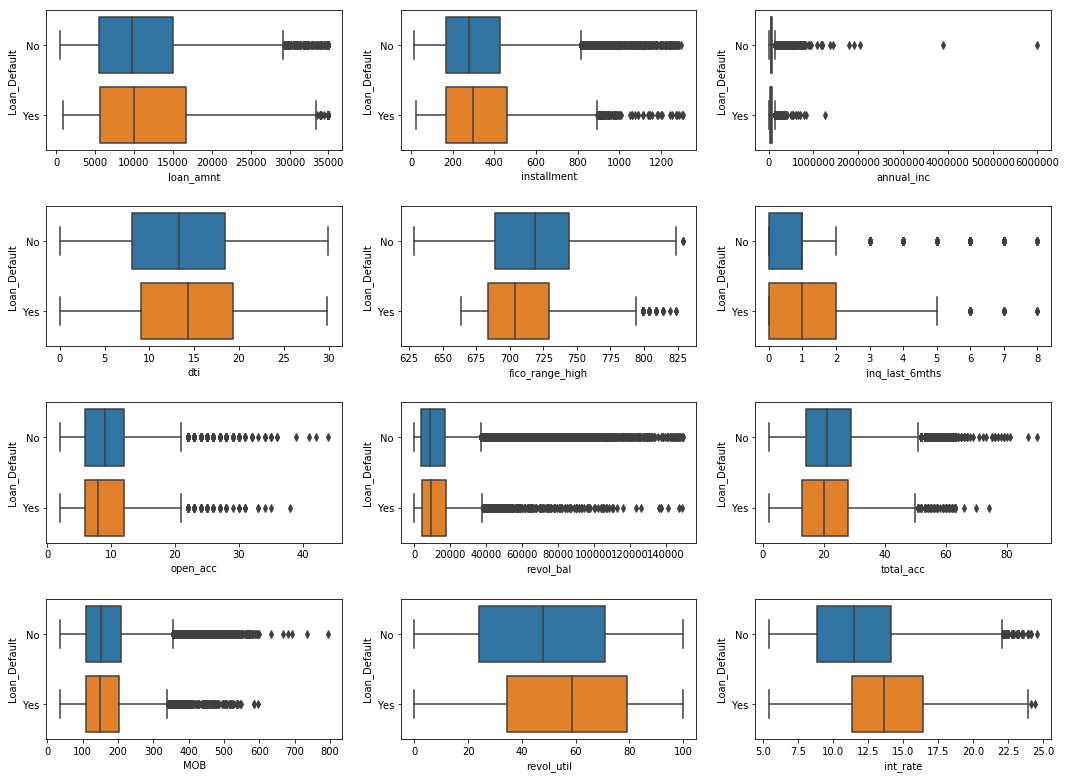

In [401]:
fig, ax =plt.subplots(4,3, figsize=(18,15))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

#sns.distplot(df.loan_amnt,  axlabel="Loan Amount", label="Loan Amount Frequency distribution",color='y',ax=ax[0][0])
sns.boxplot(x=df.loan_amnt,y=df.Loan_Default, ax=ax[0][0])
fig.show()
# installment distribution plot
sns.boxplot(df.installment,y=df.Loan_Default, ax=ax[0][1]) #The monthly payment owed by the borrower if the loan originates.
fig.show()
# funded_annual_inc distribution plot
sns.boxplot(df.annual_inc, y=df.Loan_Default, ax=ax[0][2])
fig.show()
# sti ( debt to income ratio ) distribution plot
sns.boxplot(df.dti,y=df.Loan_Default, ax=ax[1][0])
fig.show()
# fico_range_high  distribution plot
sns.boxplot(df.fico_range_high,y=df.Loan_Default, ax=ax[1][1]) #fico score is a 300-850 range score that signifies credit worthiness of borrower
fig.show()
# inq_last_6mths (enqiry last month) distribution plot
sns.boxplot(df.inq_last_6mths,y=df.Loan_Default, ax=ax[1][2])
fig.show()
# delinq_amnt distribution plot
sns.boxplot(df.open_acc, y=df.Loan_Default,ax=ax[2][0])
fig.show()
# revol_bal distribution plot
sns.boxplot(df.revol_bal,y=df.Loan_Default, ax=ax[2][1]) #In credit card terms, a revolving balance is the portion of credit card spending that goes unpaid at the end of a billing cycle
fig.show()
# total_acc  distribution plot
sns.boxplot(df.total_acc,y=df.Loan_Default, ax=ax[2][2]) # The total number of credit lines currently in the borrower's credit file
fig.show()
# MOB distribution plot
sns.boxplot(df.MOB, y=df.Loan_Default,ax=ax[3][0])
fig.show()
# revol_util distribution plot
sns.boxplot(df.revol_util,y=df.Loan_Default, ax=ax[3][1]) # revolving utilization ratio is also known as  debt-to-limit ratio or credit utilization ratio
fig.show()
# int_rate (Interest Rate on the loan) distribution plot
sns.boxplot(df.int_rate,y=df.Loan_Default, ax=ax[3][2]) 
fig.show()

Insights: 

1. Higher loan amount shows higher trend for default loans 

2. clearly we can see that loans which were applied by higher annual_income customers, more incliend to pay full loan

3. Loan with higher interest rate shows higher trend for default

4. Low fico_range_high shows higher trend for default

5. Applicants who made more enquiries in last 6 months show higher trend for default

6. Applicants with higher debt to income ratio tend to default more

7. Applicants who have utilized higher debt (out of their total credit limit) more inclined to default

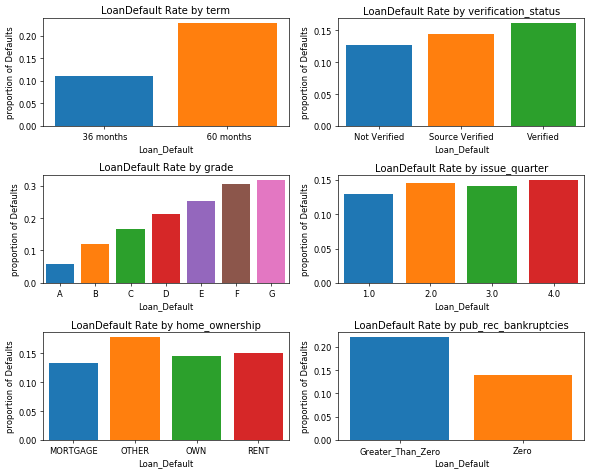

In [402]:
# loan of 60 months durations have higher proportion of defaults
f, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(10,8), dpi=60)

charge_off_rates = pd.crosstab(df.term, df.Loan_Default, dropna=False,normalize = 'index').loc[:,'Yes']
sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values ,saturation=1,ax=ax1)
ax1.set_ylabel('proportion of Defaults')
ax1.set_title('LoanDefault Rate by ' + 'term')
ax1.set_xlabel('Loan_Default')
plt.tight_layout()


charge_off_rates2 = pd.crosstab(df.verification_status, df.Loan_Default, dropna=False,normalize = 'index').loc[:,'Yes']
sns.barplot(x=charge_off_rates2.index, y=charge_off_rates2.values ,saturation=1,ax=ax2)
ax2.set_ylabel('proportion of Defaults')
ax2.set_title('LoanDefault Rate by ' + 'verification_status')
ax2.set_xlabel('Loan_Default')
plt.tight_layout()

charge_off_rates3 = pd.crosstab(df.grade, df.Loan_Default, dropna=False,normalize = 'index').loc[:,'Yes']
sns.barplot(x=charge_off_rates3.index, y=charge_off_rates3.values ,saturation=1,ax=ax3)
ax3.set_ylabel('proportion of Defaults')
ax3.set_title('LoanDefault Rate by ' + 'grade')
ax3.set_xlabel('Loan_Default')
plt.tight_layout()

charge_off_rates4 = pd.crosstab(df.issue_quarter, df.Loan_Default, dropna=False,normalize = 'index').loc[:,'Yes']
sns.barplot(x=charge_off_rates4.index, y=charge_off_rates4.values ,saturation=1,ax=ax4)
ax4.set_ylabel('proportion of Defaults')
ax4.set_title('LoanDefault Rate by ' + 'issue_quarter')
ax4.set_xlabel('Loan_Default')
plt.tight_layout()

charge_off_rates5 = pd.crosstab(df.home_ownership, df.Loan_Default, dropna=False,normalize = 'index').loc[:,'Yes']
sns.barplot(x=charge_off_rates5.index, y=charge_off_rates5.values ,saturation=1,ax=ax5)
ax5.set_ylabel('proportion of Defaults')
ax5.set_title('LoanDefault Rate by ' + 'home_ownership')
ax5.set_xlabel('Loan_Default')
plt.tight_layout()

charge_off_rates6 = pd.crosstab(df.pub_rec_bankruptcies, df.Loan_Default, dropna=False,normalize = 'index').loc[:,'Yes']
sns.barplot(x=charge_off_rates6.index, y=charge_off_rates6.values ,saturation=1,ax=ax6)
ax6.set_ylabel('proportion of Defaults')
ax6.set_title('LoanDefault Rate by ' + 'pub_rec_bankruptcies')
ax6.set_xlabel('Loan_Default')
plt.tight_layout()



Insights: 

1. Loans which were applied by people having bankrupties >0 have higher proportion of default

2. Loans which were Not Verified have higher proportion of default

3. loan of 60 months durations have higher proportion of defaults

4. Loans have almost equal distributions across home_ownership for default/non_default cases

In [403]:
df_copyfirst = df.copy()

## Data Preparation 


#### Missing Data Imputation

In [404]:
print(df.isnull().sum()[df.isnull().sum()> 0]/len(df))

emp_length    0.027097
revol_util    0.001257
dtype: float64


In [405]:
print('variables having missing values')
print(df.isnull().sum()[df.isnull().sum()> 0]/len(df))

print('------Imputation of "revol_util" ')
print(df[df.Loan_Default=='No'].revol_util.mean(),'Emp_Length Missing Count across LoanDefault=No')
print(df[df.Loan_Default=='Yes'].revol_util.mean(),'Emp_Length Missing Count across LoanDefault=Yes')
print('CONCLUSION:- loan_default have higher revol_util mean in comparison to than loan_non_default so we can impute customized mean replacing missing reol_util')
Mean1 = df[df.Loan_Default=='Yes']['revol_util'].mean()
Mean2 = df[df.Loan_Default=='No']['revol_util'].mean()
df['revol_util'] = np.where((df.revol_util.isnull()) & (df.Loan_Default=='Yes'),
  Mean1,df['revol_util'])
df['revol_util'] = np.where((df.revol_util.isnull()) & (df.Loan_Default=='No'),
  Mean2,df['revol_util'])

print('------Imputation of "Emp_Length" ')
print(df[df.Loan_Default=='No'].emp_length.value_counts()[:1],'Emp_Length Missing Count across LoanDefault=No')
print(df[df.Loan_Default=='Yes'].emp_length.value_counts()[:1],'Emp_Length Missing Count across LoanDefault=Yes')
print('CONCLUSION:- emp_length = 10+years is dominant in Default Loans and non default loans , we can impute this value inplace of missings')
df['emp_length'] = np.where(df.emp_length.isnull(),'10+years',df['emp_length'])


variables having missing values
emp_length    0.027097
revol_util    0.001257
dtype: float64
------Imputation of "revol_util" 
47.73464538278688 Emp_Length Missing Count across LoanDefault=No
55.62943226034667 Emp_Length Missing Count across LoanDefault=Yes
CONCLUSION:- loan_default have higher revol_util mean in comparison to than loan_non_default so we can impute customized mean replacing missing reol_util
------Imputation of "Emp_Length" 
10+ years    7550
Name: emp_length, dtype: int64 Emp_Length Missing Count across LoanDefault=No
10+ years    1348
Name: emp_length, dtype: int64 Emp_Length Missing Count across LoanDefault=Yes
CONCLUSION:- emp_length = 10+years is dominant in Default Loans and non default loans , we can impute this value inplace of missings


#### Outlier Treatment

In [406]:
NumericalCol = []
for col in df.columns:
    col = str(col)
    typecol = df[col].dtypes
    b = typecol.type
    if b != np.object_:
        NumericalCol.append(col)

NumericalDf = df[NumericalCol]
CatDf = df.drop(columns = NumericalCol)

Q1 = NumericalDf.quantile(0.25)
Q3 = NumericalDf.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
def outlier(X):
    Y = np.where((NumericalDf[NumericalDf.columns[X]] < (Q1[X] - 1.5 * IQR[X])) 
    |(NumericalDf[NumericalDf.columns[X]] > (Q3[X] + 1.5 * IQR[X])),NumericalDf[NumericalDf.columns[X]].median(),NumericalDf[NumericalDf.columns[X]])
    return Y
NumericalDf['fico_range_high'] = outlier(6)
NumericalDf['revol_bal'] = outlier(9)
NumericalDf['annual_inc'] = outlier(3)
NumericalDf['total_Acc'] = outlier(11)
NumericalDf['open_acc'] = outlier(8)
NumericalDf['MOB'] = outlier(13)
CatDf = CatDf.dropna()


#### One Hot Encoding

Target Variable

In [407]:
CatDf['Loan_Default'] = np.where(CatDf['Loan_Default']=='Yes',1,0) 
Loan_Default = pd.DataFrame(CatDf['Loan_Default'])
del CatDf['Loan_Default']

Independent Variables

In [408]:
enc = OneHotEncoder(sparse=False,handle_unknown = 'ignore')
dummydata = enc.fit_transform(CatDf)
dummydata = pd.DataFrame(dummydata)
names = enc.get_feature_names(['term', 'grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'pub_rec', 'pub_rec_bankruptcies',
       'issue_quarter'])
#to include nueric user'[^ws]'
names = [re.sub(r'[<]', "LessThan", d, flags=re.I) for d in names]
names = [re.sub(r'[>]', "GreaterThan", d, flags=re.I) for d in names]
names = [re.sub(r'[+]', "Plus", d, flags=re.I) for d in names]
names = [re.sub(r'[ ]', "_", d, flags=re.I) for d in names] 
dummydata.columns = names

In [409]:
df= pd.concat([NumericalDf,dummydata,Loan_Default],axis=1)

In [410]:
df_copySecond = df.copy()

Handling Unbalance Data: No Need of Oversampling

In [411]:
print(df.Loan_Default.value_counts()/len(df))

0    0.857477
1    0.142523
Name: Loan_Default, dtype: float64


#### Splitting data for modelling
Model data: Loan Applications for year 2007 and 2009-2011 are taken for modelling

Holdout data: Loan Applications for year 2008 are taken for modelling

In [412]:
df['issue_year'] = df['issue_year'].astype(int)
modeldata = df[df['issue_year']!=2008]
del modeldata['issue_year']
holdoutdata = df[df['issue_year']==2008]
del holdoutdata['issue_year']

In [413]:
y = pd.DataFrame(modeldata['Loan_Default'])
y = y.astype(int)
X = modeldata.drop(['Loan_Default'],axis=1)

#### Feature Scaling

In [414]:
columns = X.columns
Scale = StandardScaler()
Scale.fit(X)
X = Scale.transform(X)
X= pd.DataFrame(X,columns = columns)

#### Train/Test Split

In [415]:
a = random.sample(range(0, X.shape[0]), int(X.shape[0]*0.70))
X_train = X.iloc[a,] 
X_test = X.drop(X.index[a])
y_train = y.iloc[a,] 
y_test = y.drop(y.index[a])

#### Feature Selection
we will use randomforest for selection of important features which is important in prediction of target variable

In [416]:
clf = RandomForestClassifier(criterion = 'gini')
sfm = SelectFromModel(clf, threshold=0.001) 
sfm.fit(X_train,y_train)
X_train_new = sfm.transform(X_train)
X_train_new = pd.DataFrame(X_train_new)
X_test_new = sfm.transform(X_test)
X_test_new = pd.DataFrame(X_test_new)
X_train_new.columns= X_train.columns[sfm.get_support(indices=True)]
X_test_new.columns= X_test.columns[sfm.get_support(indices=True)]

## Model Development and Obtain best classifier through Parameter-Tuning via Cross validation

### Logistic Regression 

In [417]:
scoring = ['precision_macro','recall_macro','accuracy']
Matrix1 = pd.DataFrame(columns = ['CV_accuracy','CV_precision_macro','CV_recall_macro'])
C = [-1,0,1,2]
for i in C:
    clf = linear_model.LogisticRegression(C = 10**i,random_state=0)
    scores = cross_validate(estimator = clf,X=X_train_new, y=y_train,cv=3,scoring=scoring)
    a = pd.DataFrame(scores)
    a = a[['test_accuracy','test_precision_macro','test_recall_macro']]
    a = a.rename(columns = {'test_accuracy':'CV_accuracy','test_precision_macro':'CV_precision_macro','test_recall_macro':'CV_recall_macro'})
    a['C']=10**i
    Matrix1 = pd.concat([a,Matrix1],axis=0)
Matrix1 = pd.DataFrame(Matrix1.groupby(['C'])['CV_accuracy','CV_precision_macro','CV_recall_macro'].mean())
Matrix1 = Matrix1.reset_index()
Matrix1 = Matrix1.rename(columns = {'CV_precision_macro':'CV_precision','CV_recall_macro':'CV_recall'})
print('-----Best Parameters for Logistic Regression-----')
Matrix1[['C','CV_accuracy','CV_recall','CV_precision']][Matrix1['CV_recall'] ==Matrix1['CV_recall'].max()] 


-----Best Parameters for Logistic Regression-----


,C,CV_accuracy,CV_recall,CV_precision
0,0.1,0.858825,0.504827,0.661965


### Random Forest 


In [418]:
scoring = ['precision_macro','recall_macro','accuracy']
Matrix2 = pd.DataFrame(columns = ['CV_accuracy','CV_precision_macro','CV_recall_macro','Max_depth'])
max_depth = [10,20,30]
n_estimators = [1,2,3]
criterion = ['gini','entropy']
for k in criterion:
    for j in n_estimators:
        for i in max_depth:
            clf = RandomForestClassifier(max_depth = i,n_estimators=j*100,criterion=k,random_state=0)
            scores = cross_validate(estimator = clf,X=X_train_new, y=y_train,cv=3,scoring=scoring)
            a = pd.DataFrame(scores)
            a = a[['test_accuracy','test_precision_macro','test_recall_macro']]
            a = a.rename(columns = {'test_accuracy':'CV_accuracy','test_precision_macro':'CV_precision_macro','test_recall_macro':'CV_recall_macro'})
            a['Max_depth']=i
            a['n_estimators']=j*100
            a['criterion']=k
            Matrix2 = pd.concat([a,Matrix2],axis=0)
Matrix2 = pd.DataFrame(Matrix2.groupby(['Max_depth','criterion','n_estimators'])['CV_accuracy','CV_precision_macro','CV_recall_macro'].mean())
Matrix2 = Matrix2.reset_index()
Matrix2 = Matrix2.rename(columns = {'CV_precision_macro':'CV_precision','CV_recall_macro':'CV_recall'})
print('-----Best Parameters for Random Forest-----')
Matrix2[['Max_depth','n_estimators','criterion','CV_accuracy','CV_recall','CV_precision']][Matrix2['CV_recall'] ==Matrix2['CV_recall'].max()]

-----Best Parameters for Random Forest-----


,Max_depth,n_estimators,criterion,CV_accuracy,CV_recall,CV_precision
9,20,100.0,gini,0.859199,0.502045,0.671162


#### Gradient Boosting 

In [438]:
scoring = ['precision_macro','recall_macro','accuracy']
Matrix3 = pd.DataFrame(columns = ['CV_accuracy','CV_precision_macro','CV_recall_macro','Max_depth'])
max_depth = [5,10,20]
n_estimators = [1,2]
learning_Rate = [5,10,20]
for k in learning_Rate:
    for j in n_estimators:
        for i in max_depth:
            clf = XGBClassifier(max_depth = i,n_estimators=j*100,learning_Rate=k/100,random_state=0)
            scores = cross_validate(estimator = clf,X=X_train_new, y=y_train,cv=3,scoring=scoring)
            a = pd.DataFrame(scores)
            a = a[['test_accuracy','test_precision_macro','test_recall_macro']]
            a = a.rename(columns = {'test_accuracy':'CV_accuracy','test_precision_macro':'CV_precision_macro','test_recall_macro':'CV_recall_macro'})
            a['Max_depth']=i
            a['n_estimators']=j*100
            a['learning_Rate']=k/10
            Matrix3 = pd.concat([a,Matrix3],axis=0)
Matrix3 = pd.DataFrame(Matrix3.groupby(['Max_depth','learning_Rate','n_estimators'])['CV_accuracy','CV_precision_macro','CV_recall_macro'].mean())
Matrix3 = Matrix3.reset_index()
Matrix3 = Matrix3.rename(columns = {'CV_precision_macro':'CV_precision','CV_recall_macro':'CV_recall'})
print('-----Best Parameters for Gradient Boosting-----')
Matrix3[['Max_depth','n_estimators','learning_Rate','CV_accuracy','CV_recall','CV_precision']][Matrix3['CV_recall'] ==Matrix3['CV_recall'].max()] 


-----Best Parameters for Gradient Boosting-----


,Max_depth,n_estimators,learning_Rate,CV_accuracy,CV_recall,CV_precision
7,10,200.0,0.05,0.855124,0.513783,0.611895
9,10,200.0,0.10,0.855124,0.513783,0.611895
11,10,200.0,0.20,0.855124,0.513783,0.611895


## Validation of model on test data (validation data) along with performance summary

In [420]:
def AUCCurve(OriginalValues, predictedvalues, modelname):
    fpr, tpr, _ = metrics.roc_curve(OriginalValues,predictedvalues)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= modelname +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")


#### Model 1 : Logistic Regression with Best Tuned parameter

In [421]:
clfLG = linear_model.LogisticRegression(C = 1.0)
clfLG.fit(X=X_train_new, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Model 2 : Random Forest with Best Tuned parameter

In [422]:
clfrf = RandomForestClassifier(max_depth = 20,n_estimators=100,criterion='gini',random_state=0)
clfrf.fit(X_train_new,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Model 3 : Gradient Boosting with Best Tuned parameter

In [439]:
clfxgb = XGBClassifier(max_depth = 10,n_estimators=200,learning_Rate=0.2,random_state=0)
clfxgb.fit(X_train_new,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_Rate=0.2, learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [440]:
y_pred_lg = clfLG.predict(X_test_new)
y_pred_test_prob_lg = clfLG.predict_proba(X_test_new)
y_pred_test_prob_lg = pd.DataFrame(y_pred_test_prob_lg)
y_pred_test_prob_lg = y_pred_test_prob_lg.iloc[:,1]
y_pred_rf = clfrf.predict(X_test_new)
y_pred_test_prob_rf = clfrf.predict_proba(X_test_new)
y_pred_test_prob_rf = pd.DataFrame(y_pred_test_prob_rf)
y_pred_test_prob_rf = y_pred_test_prob_rf.iloc[:,1]
y_pred_xgb = clfxgb.predict(X_test_new)
y_pred_test_prob_xgb = clfxgb.predict_proba(X_test_new)
y_pred_test_prob_xgb = pd.DataFrame(y_pred_test_prob_xgb)
y_pred_test_prob_xgb = y_pred_test_prob_xgb.iloc[:,1]


In [441]:
print(accuracy_score(y_test,y_pred_lg),'accuracy score for logistic regression')
print(classification_report(y_test,y_pred_lg))
print('--------------------------------------------------')
print(accuracy_score(y_test,y_pred_rf),'accuracy score for random forest')
print(classification_report(y_test,y_pred_rf))
print('--------------------------------------------------')
print(accuracy_score(y_test,y_pred_xgb),'accuracy score for gradient boosting')
print(classification_report(y_test,y_pred_xgb))


0.8543646987006192 accuracy score for logistic regression
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      9808
           1       0.39      0.01      0.02      1659

    accuracy                           0.85     11467
   macro avg       0.62      0.50      0.47     11467
weighted avg       0.79      0.85      0.79     11467

--------------------------------------------------
0.8546263190023545 accuracy score for random forest
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      9808
           1       0.36      0.01      0.01      1659

    accuracy                           0.85     11467
   macro avg       0.61      0.50      0.47     11467
weighted avg       0.78      0.85      0.79     11467

--------------------------------------------------
0.8494811197348914 accuracy score for gradient boosting
              precision    recall  f1-score   support

           0       0.86

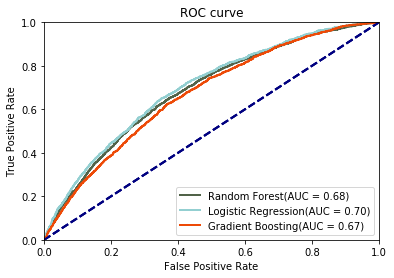

<Figure size 432x432 with 0 Axes>

In [442]:
AUCCurve(y_test,y_pred_test_prob_rf, 'Random Forest')
AUCCurve(y_test,y_pred_test_prob_lg,'Logistic Regression')
AUCCurve(y_test,y_pred_test_prob_xgb,'Gradient Boosting')
plt.show()
plt.figure(figsize=(6,6))
plt.show()

#### Best Model based on 2 Level Validation : XGBoost
It has highest recall on validation data

## Final Test on Loan Application Data (Year 2008) 

In [443]:
X_holdout = holdoutdata.drop('Loan_Default',axis=1)
y_holdout  = pd.DataFrame(holdoutdata['Loan_Default'])


Scaling 

In [444]:
columns = X_holdout.columns
X_holdout_new = Scale.transform(X_holdout)


Feature Selection

In [445]:
X_holdout_new= pd.DataFrame(X_holdout_new,columns = columns)
X_holdout_new = X_holdout_new[X_train_new.columns]


Prediction

In [446]:
y_pred_holdout = clfxgb.predict(X_holdout_new)
y_pred_prob_holdout = clfxgb.predict_proba(X_holdout_new)

In [447]:
print(accuracy_score(y_holdout,y_pred_holdout) , 'Accuracy score on 2008 Loan Application Data')
print(classification_report(y_holdout,y_pred_holdout))

0.8405889884763125 Accuracy score on 2008 Loan Application Data
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1315
           1       0.33      0.01      0.02       247

    accuracy                           0.84      1562
   macro avg       0.59      0.50      0.46      1562
weighted avg       0.76      0.84      0.77      1562



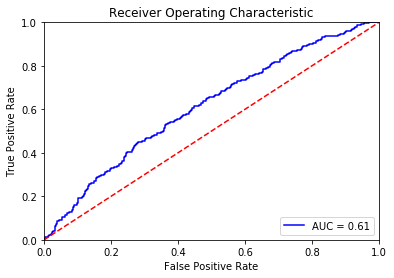

In [448]:
fpr, tpr, threshold = metrics.roc_curve(y_holdout.Loan_Default.ravel(), np.array(pd.DataFrame(y_pred_prob_holdout).iloc[:,1]),pos_label = 1)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## FINAL MODEL SAVE

In [449]:
with open('MLModel','wb') as f:
    pickle.dump(clfxgb,f)

In [450]:
with open('MLModel','rb') as f:
    clfxgb2 = pickle.load(f)